<a href="https://colab.research.google.com/github/meleeshagamage/CourseWork_ML/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1

In [278]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import tree

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

import itertools

import keras_tuner as kt



print("Libraries loaded")

Libraries loaded


In [279]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [280]:
#Import the dataset
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [281]:
#Get the shape
print("Shape:", df.shape)
df.info()

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [282]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [283]:
#Count Missing Values
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


### EDA visualizations


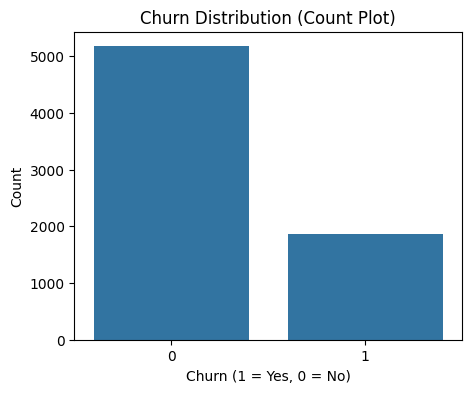

In [284]:
# Convert churn columnif needed
df['Churn_numeric'] = df['Churn'].map({'Yes':1, 'No':0})

# Plot 'Churn' feature
plt.figure(figsize=(5,4))
sns.countplot(x='Churn_numeric', data=df)
plt.title('Churn Distribution (Count Plot)')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()



Numeric cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']


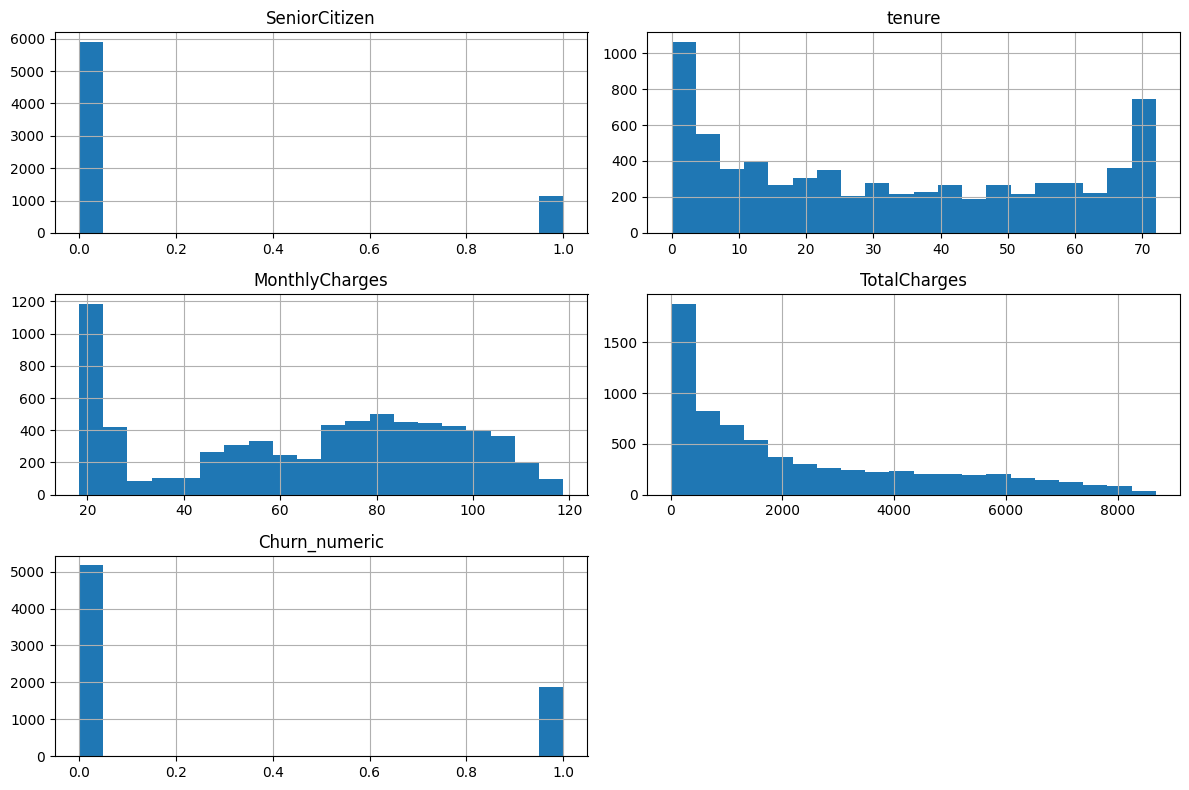

In [285]:
# Numeric columns histograms
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric cols:", num_cols)
df[num_cols].hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

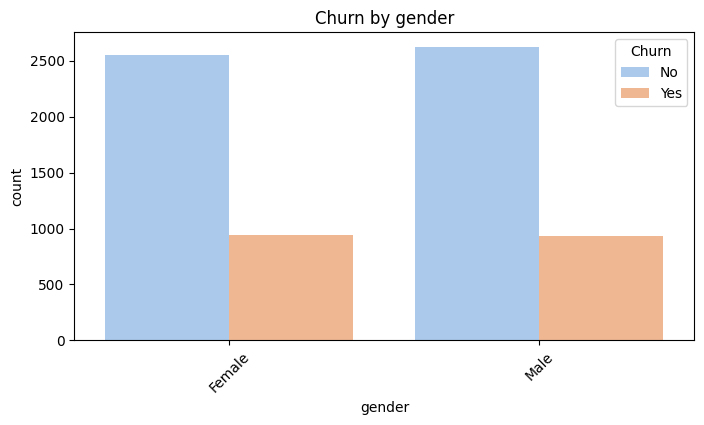

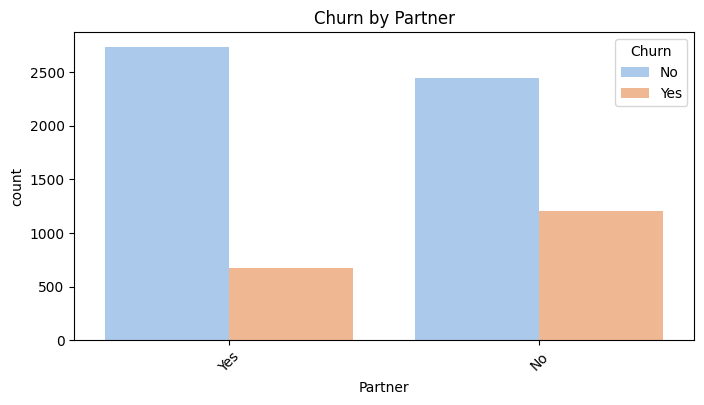

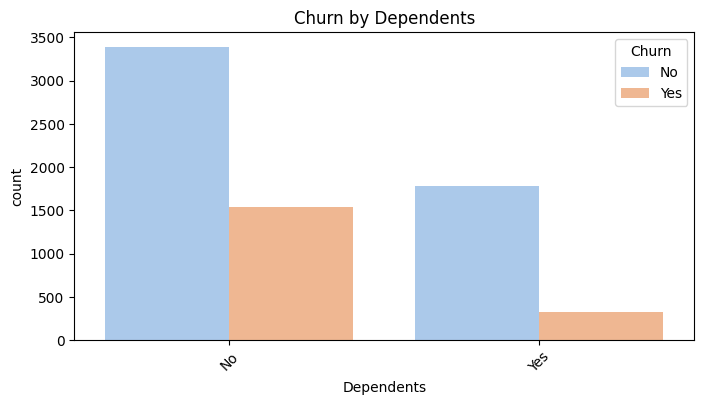

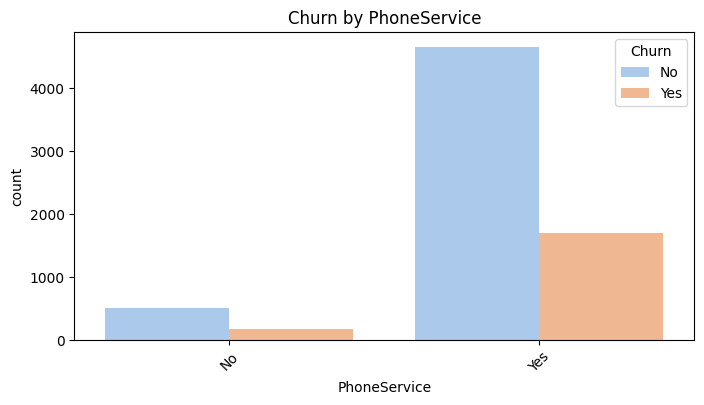

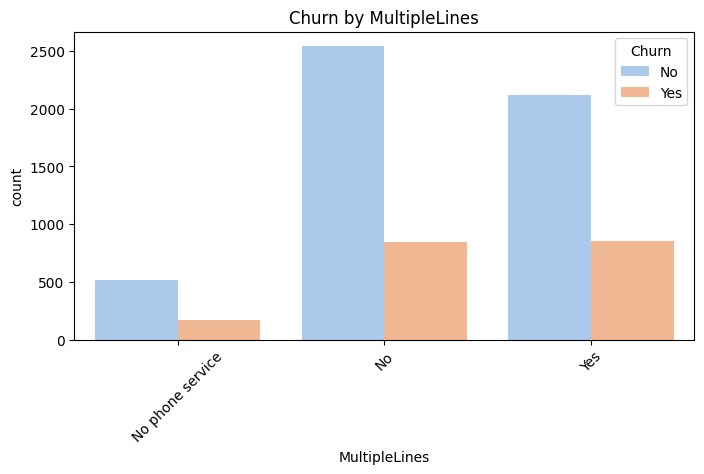

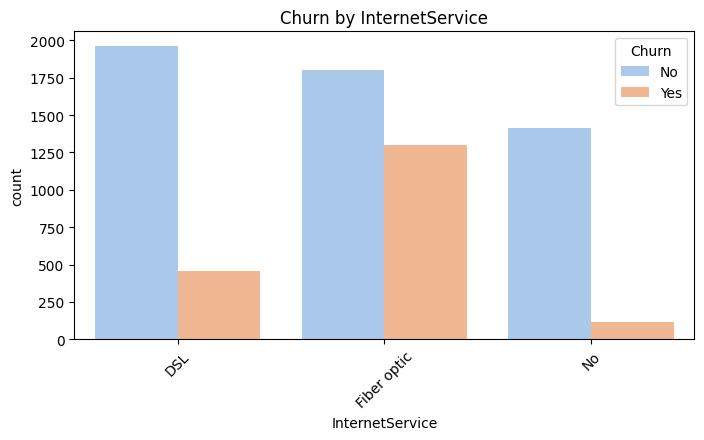

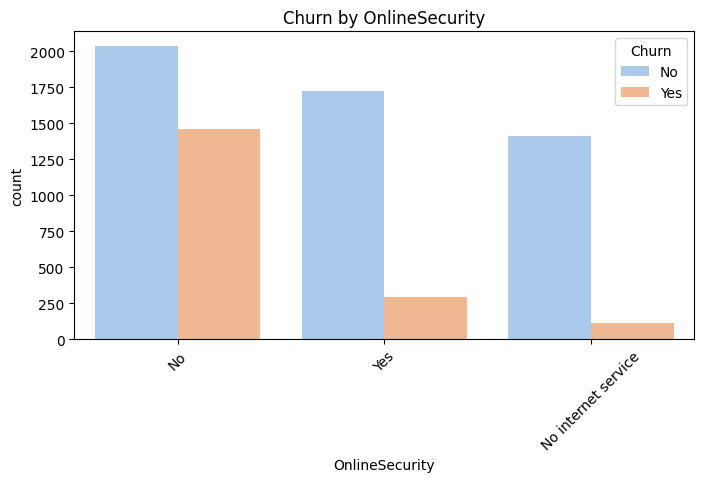

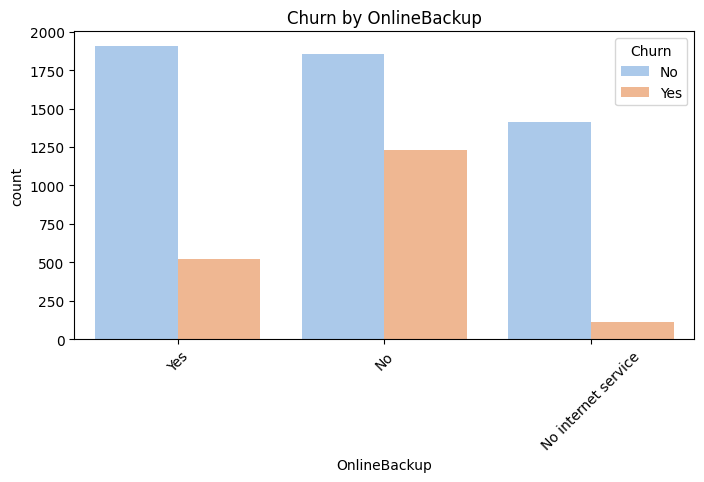

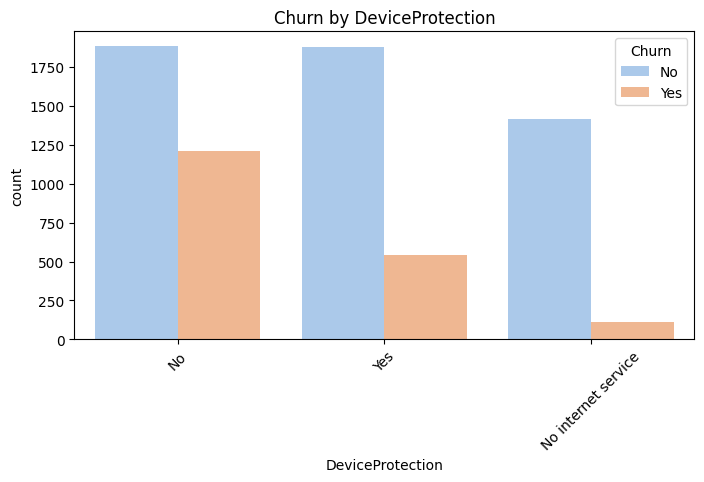

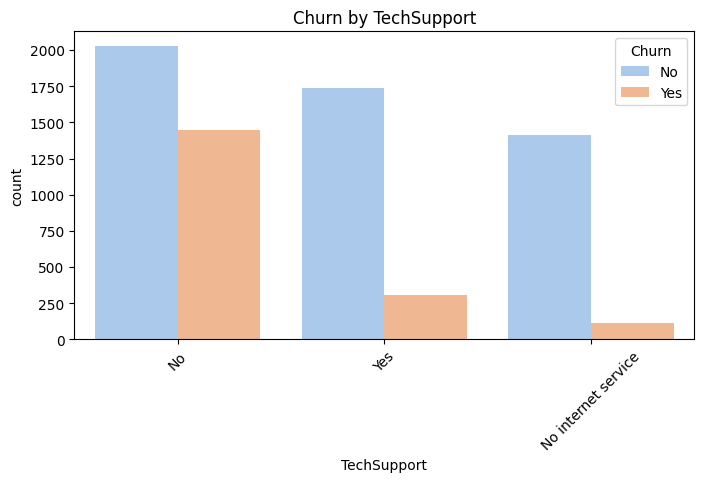

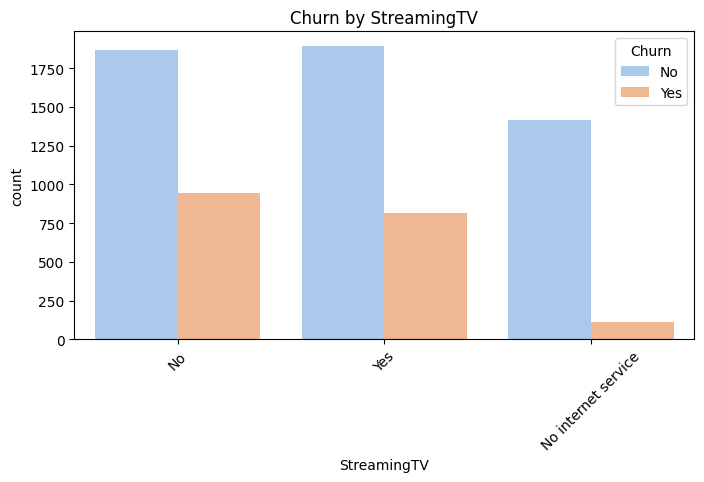

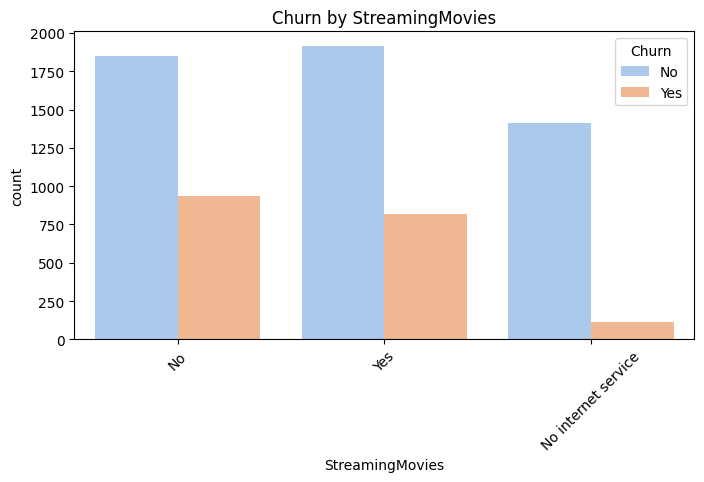

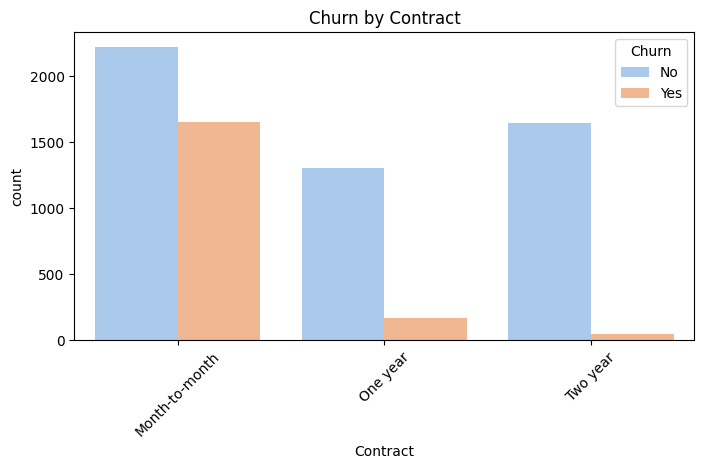

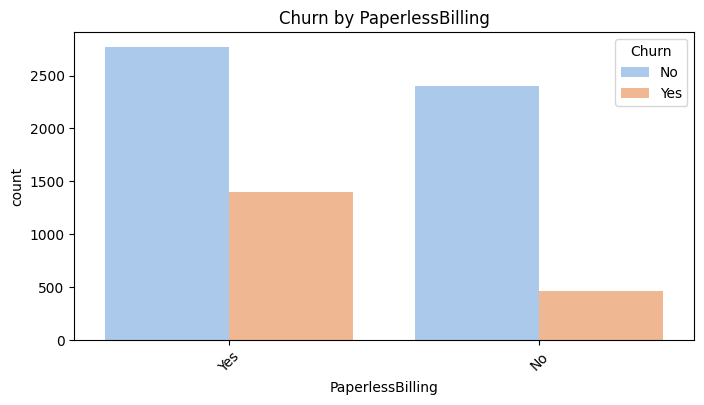

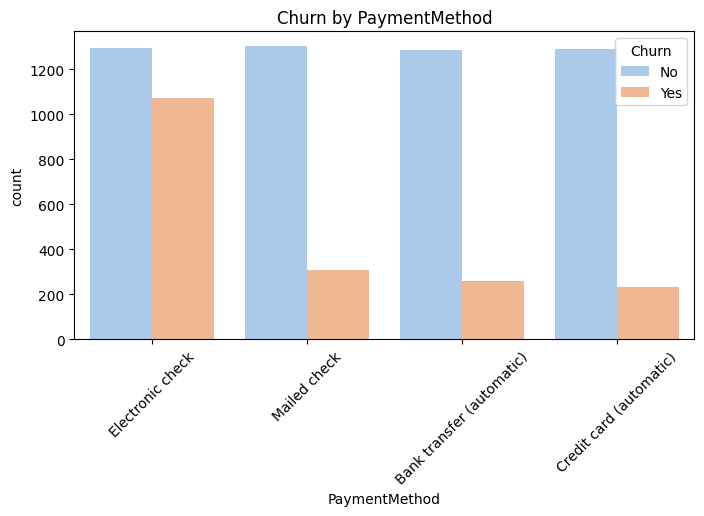

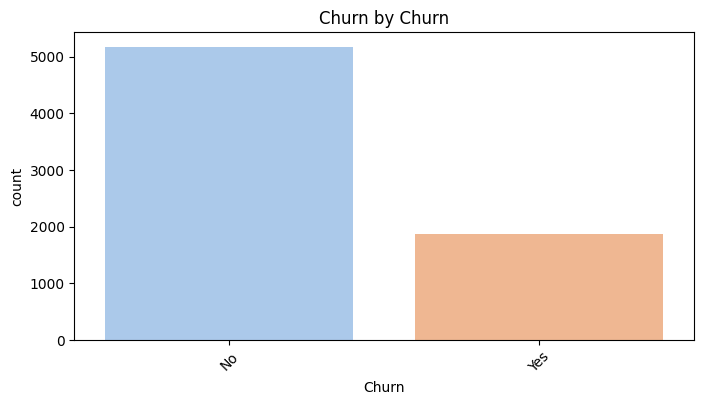

In [286]:
# Categorical colunms distributions
categorical_cols = df.select_dtypes(include=['object']).columns.drop('customerID')

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df, palette='pastel')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.show()


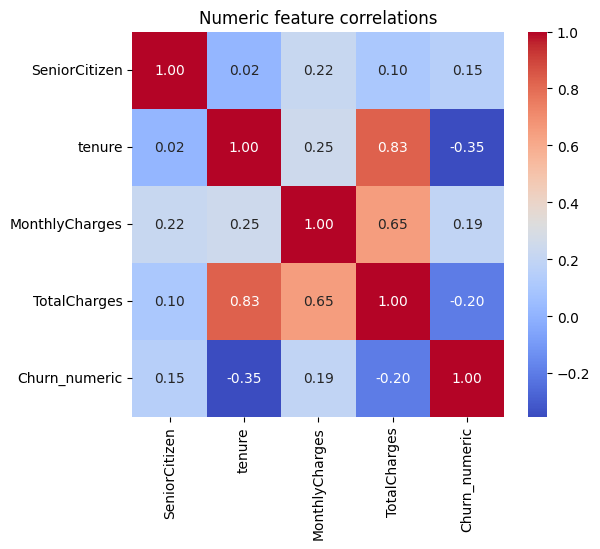

In [287]:
# Correlation heatmap among numeric features
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric feature correlations')
plt.show()

### Data Cleaning

In [288]:
# Drop 'customerID' column
df = df.drop(columns=['customerID'], errors='ignore')

In [289]:
# Fill missing va;ues with Median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [290]:
# Drop 'Churn_numeric' feature
df = df.drop(columns=['Churn_numeric'], errors='ignore')

In [291]:
# Encode target
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

### Train-test split

In [292]:
# Split Data
y = df['Churn']
X = df.drop(columns=['Churn'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [293]:
# After spliting the data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 19)
X_test shape: (1409, 19)
y_train shape: (5634,)
y_test shape: (1409,)


In [294]:
# Check class distribution is maintained
print(f"\nOriginal churn ratio: {df['Churn'].value_counts(normalize=True)}")
print(f"Train churn ratio: {y_train.value_counts(normalize=True)}")
print(f"Test churn ratio: {y_test.value_counts(normalize=True)}")


Original churn ratio: Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
Train churn ratio: Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Test churn ratio: Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### Processing the Data

In [295]:
# After splitting, identify columns from trainig data only
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()


print("Numeric features for preprocessing:", numeric_features)
print("Categorical features for preprocessing:", categorical_features)

Numeric features for preprocessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features for preprocessing: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [296]:
# Build the preprocessing pipeline

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

#
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='first'))

])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

# TASK 2

### Decision Tree with hyperparameter tuning

In [205]:
dt_pipeline = Pipeline(steps=[
    ("preproc", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42))
])

In [206]:
# Preprocess manually for default model
X_train_pp = preprocessor.fit_transform(X_train)
X_test_pp  = preprocessor.transform(X_test)

clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train_pp, y_train)

# Predictions
y_pred_default = clf_default.predict(X_test_pp)
y_proba_default = clf_default.predict_proba(X_test_pp)[:, 1]


In [207]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Precision:", precision_score(y_test, y_pred_default))
print("Recall:", recall_score(y_test, y_pred_default))
print("F1:", f1_score(y_test, y_pred_default))
print("ROC AUC:", roc_auc_score(y_test, y_proba_default))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_default))

Accuracy: 0.7409510290986515
Precision: 0.5125348189415042
Recall: 0.4919786096256685
F1: 0.5020463847203275
ROC AUC: 0.6609574000878348

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1035
           1       0.51      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



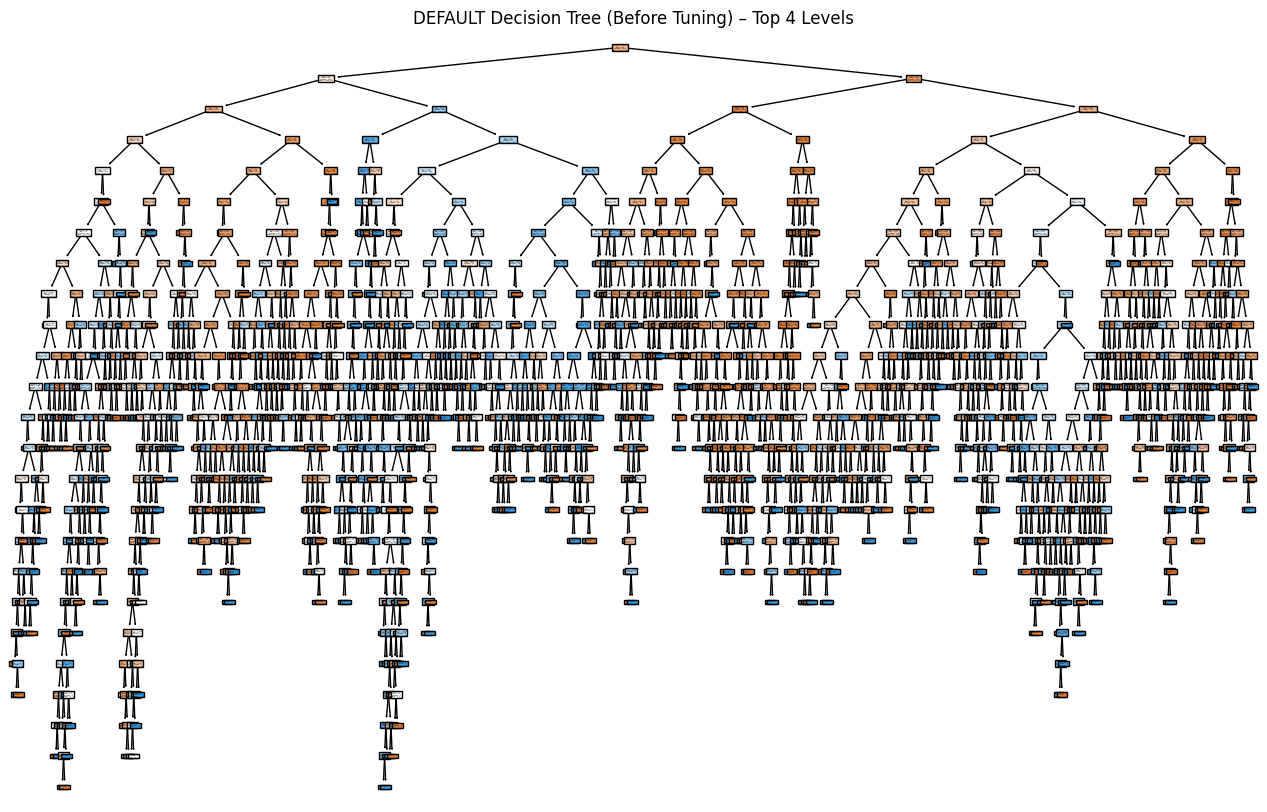

In [208]:
# Plot Default Tree
plt.figure(figsize=(16,10))
plot_tree(clf_default, filled=True)
plt.title("DEFAULT Decision Tree (Before Tuning) – Top 4 Levels")
plt.show()

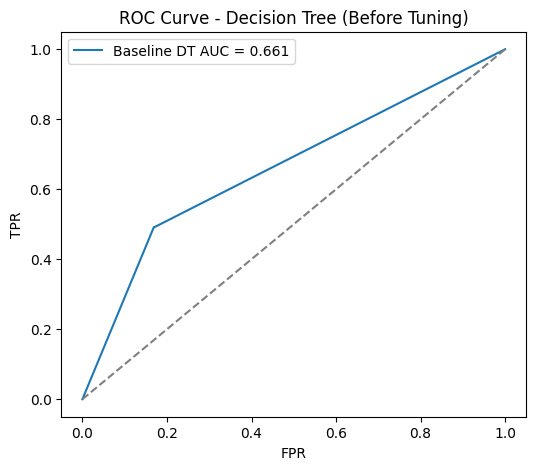

In [209]:
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_default )
auc_base = auc(fpr_base, tpr_base)
plt.figure(figsize=(6, 5))
plt.plot(fpr_base, tpr_base, label=f"Baseline DT AUC = {auc_base:.3f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve - Decision Tree (Before Tuning)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [210]:
# Tunes the decision‑tree pipeline’s hyperparameters

param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 8, 12, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__class_weight': [None, 'balanced']
}

grid_dt = GridSearchCV(
    dt_pipeline,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)


grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='...
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__class_weight': [None, 'balanced'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 5, 8, 12, None],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [211]:
# Get best hyperparameters found
print("Best Decision Tree parameters:")
print(grid_dt.best_params_)
print("\nBest CV F1-score (training CV):")
print(grid_dt.best_score_)

Best Decision Tree parameters:
{'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': 8, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}

Best CV F1-score (training CV):
0.6111844563666912


In [212]:
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]


In [326]:
print(" TEST RESULTS ")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

 TEST RESULTS 
Accuracy: 0.7324343506032647
Precision: 0.4975609756097561
Recall: 0.8181818181818182
F1: 0.6188068756319515
ROC AUC: 0.8211165362060502

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.50      0.82      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409



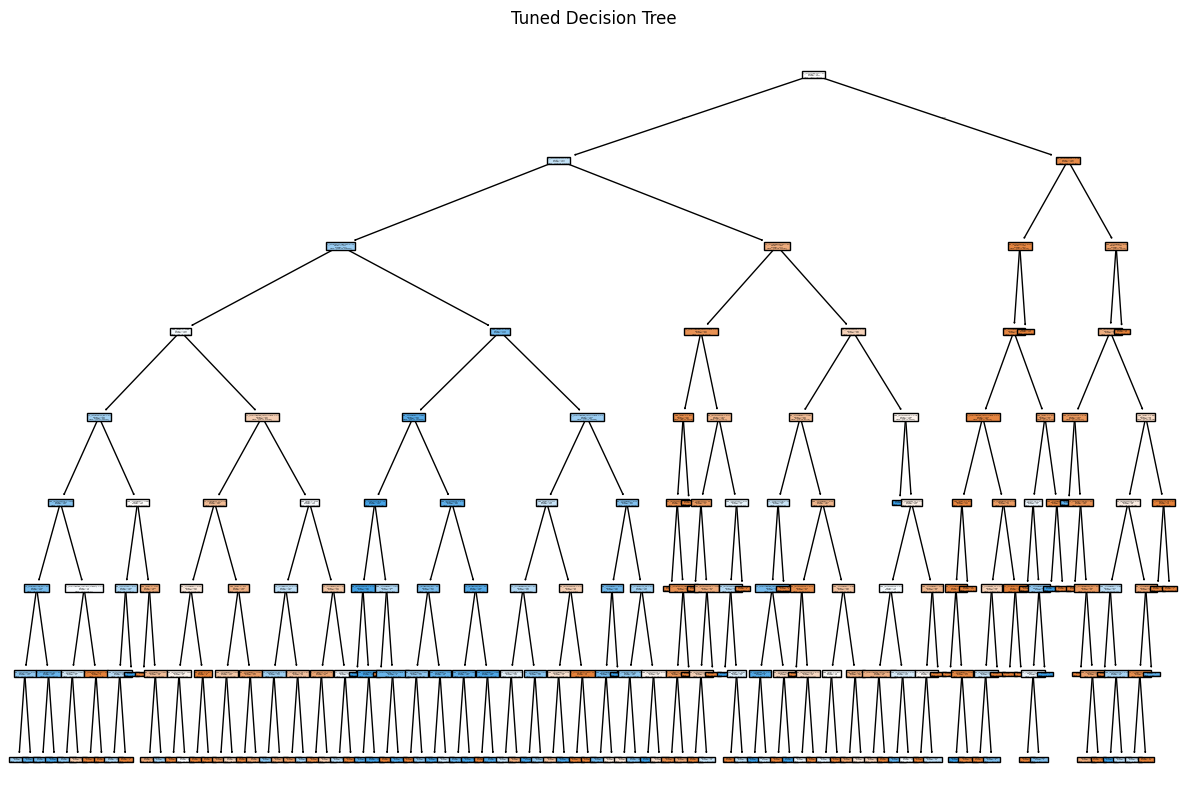

In [214]:
# Tuned pipeline from GridSearchCV
best_dt = grid_dt.best_estimator_

# Get the tuned DecisionTreeClassifier inside the pipeline
clf_tuned = best_dt.named_steps["clf"]
plt.figure(figsize=(15, 10))
tree.plot_tree(
    clf_tuned,
    feature_names=best_dt.named_steps["preproc"].get_feature_names_out(),
    filled=True
)
plt.title("Tuned Decision Tree")
plt.show()

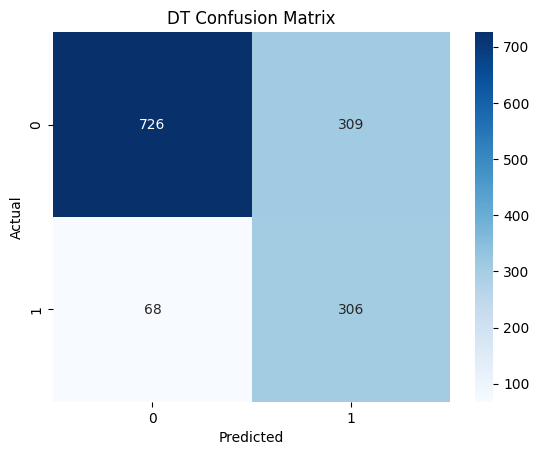

In [215]:
# Plot Confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('DT Confusion Matrix')
plt.show()

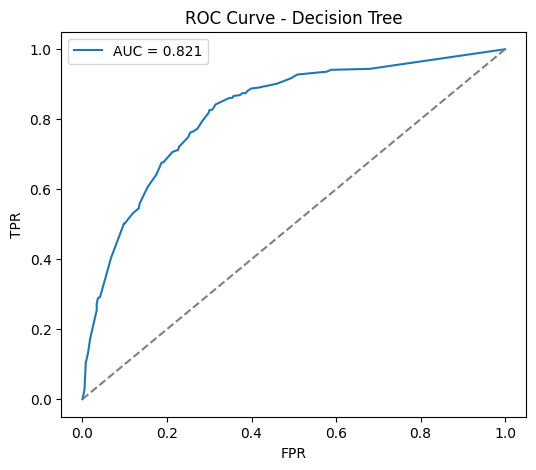

In [216]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.title("ROC Curve - Decision Tree")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()


### Neural Network

In [321]:
# Preprocess data using  existing preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)


X_train_np = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed
X_test_np  = X_test_processed.toarray()  if hasattr(X_test_processed, "toarray")  else X_test_processed

y_train_np = y_train.values
y_test_np  = y_test.values

input_dim = X_train_np.shape[1]
print("Input dimension for ANN:", input_dim)


Input dimension for ANN: 30


In [322]:
def build_default_model():
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

default_model = build_default_model()
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_default = default_model.fit(
    X_train_pp, y_train_np,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7190 - loss: 0.5233 - val_accuracy: 0.7897 - val_loss: 0.4422
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4195 - val_accuracy: 0.7782 - val_loss: 0.4383
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.4136 - val_accuracy: 0.7986 - val_loss: 0.4386
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4109 - val_accuracy: 0.7933 - val_loss: 0.4344
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.3992 - val_accuracy: 0.7977 - val_loss: 0.4356
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4018 - val_accuracy: 0.7933 - val_loss: 0.4339
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.3877 - val_accuracy: 0.8021 - val_loss: 0.4352
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8148 - loss: 0.4004 - val_accuracy: 0.

In [323]:
# Predictions and metrics
y_pred_prob_default = default_model.predict(X_test_pp).ravel()
y_pred_default = (y_pred_prob_default >= 0.5).astype(int)

metrics_default = {
    'Accuracy': accuracy_score(y_test_np, y_pred_default),
    'Precision': precision_score(y_test_np, y_pred_default),
    'Recall': recall_score(y_test_np, y_pred_default),
    'F1-Score': f1_score(y_test_np, y_pred_default),
    'ROC-AUC': roc_auc_score(y_test_np, y_pred_prob_default)
}
print("Metrics Before Tuning:", metrics_default)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Metrics Before Tuning: {'Accuracy': 0.7991483321504613, 'Precision': 0.64, 'Recall': 0.5561497326203209, 'F1-Score': 0.5951359084406295, 'ROC-AUC': np.float64(0.8434059262703764)}


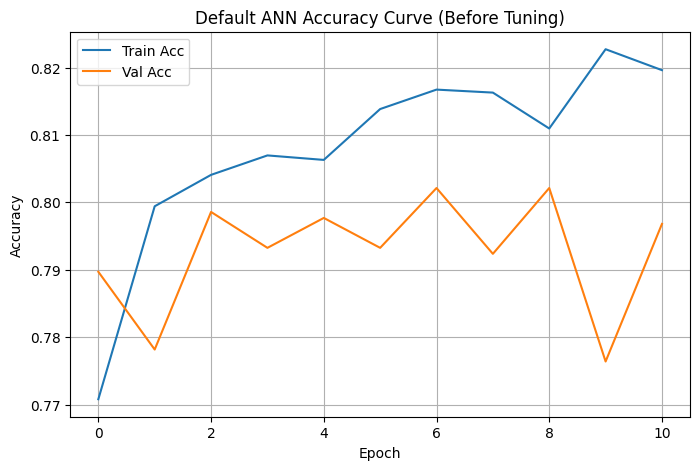

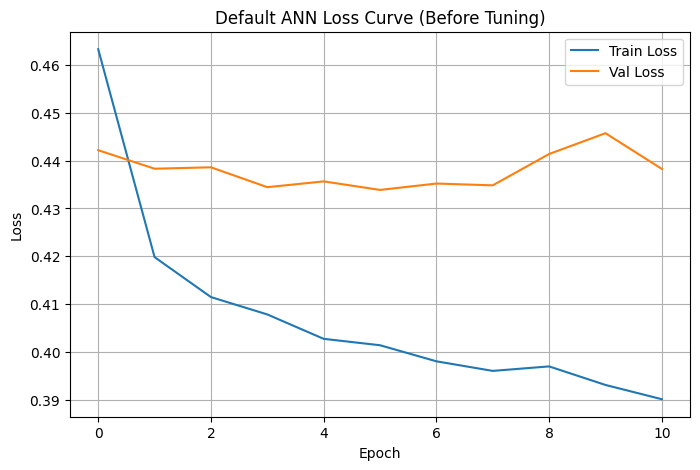

In [324]:

# --- Accuracy Plot ---
plt.figure(figsize=(8,5))
plt.plot(history_default.history['accuracy'], label='Train Acc')
plt.plot(history_default.history['val_accuracy'], label='Val Acc')
plt.title("Default ANN Accuracy Curve (Before Tuning)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history_default.history['loss'], label='Train Loss')
plt.plot(history_default.history['val_loss'], label='Val Loss')
plt.title("Default ANN Loss Curve (Before Tuning)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

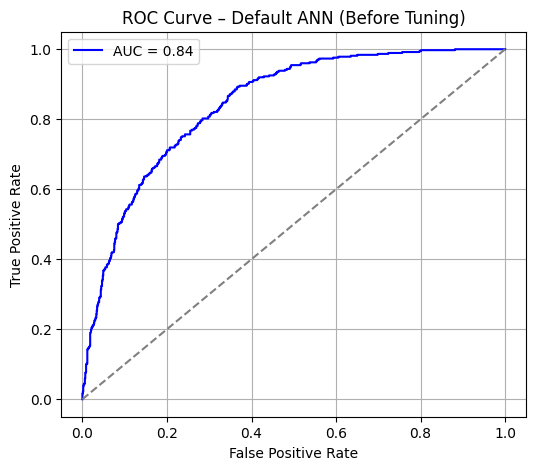

In [325]:
fpr, tpr, _ = roc_curve(y_test_np, y_pred_prob_default) s
roc_value = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_value:.2f}", color='blue')
plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – ANN Before Tuning")
plt.legend()
plt.grid(True)
plt.show()

In [316]:
# ANN After Hyperparameter Tuning

def build_model(hp):
    model = Sequential()
    units = hp.Int('units', 32, 128, step=32)
    layers_count = hp.Int('layers', 1, 3)
    dropout_rate = hp.Float('dropout', 0.0, 0.5, step=0.1)

    model.add(Dense(units, activation='relu'))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    for _ in range(layers_count - 1):
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [317]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='nn_churn'
)

tuner.search(X_train_pp, y_train_np, validation_split=0.2, epochs=50, batch_size=32, callbacks=[es])

Reloading Tuner from keras_tuner_dir/nn_churn/tuner0.json


In [318]:
# Get best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:", best_hyperparams.values)


Best Hyperparameters: {'units': 64, 'layers': 3, 'dropout': 0.0}


In [319]:
# Train best model fully
history_best = best_model.fit(
    X_train_pp, y_train_np,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8211 - loss: 0.3900 - val_accuracy: 0.7986 - val_loss: 0.4406
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.3669 - val_accuracy: 0.7835 - val_loss: 0.4432
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.3910 - val_accuracy: 0.8030 - val_loss: 0.4322
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8207 - loss: 0.3809 - val_accuracy: 0.7986 - val_loss: 0.4372
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8286 - loss: 0.3681 - val_accuracy: 0.7933 - val_loss: 0.4389
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8268 - loss: 0.3703 - val_accuracy: 0.7844 - val_loss: 0.4453
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8372 - loss: 0.3579 - val_accuracy: 0.7844 - val_loss: 0.4523
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8297 - loss: 0.3727 - val_accuracy: 0.

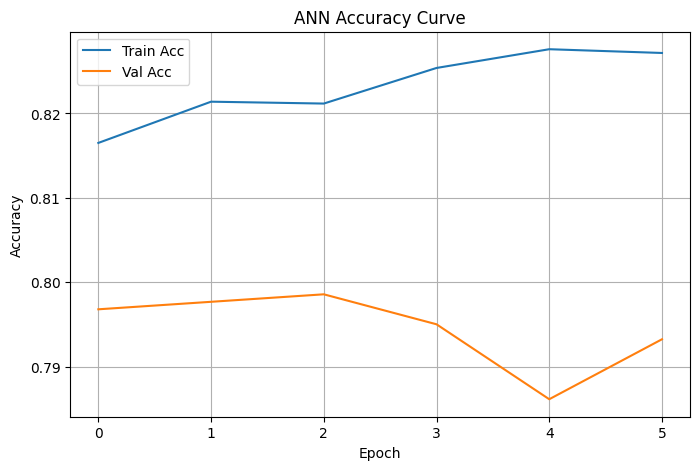

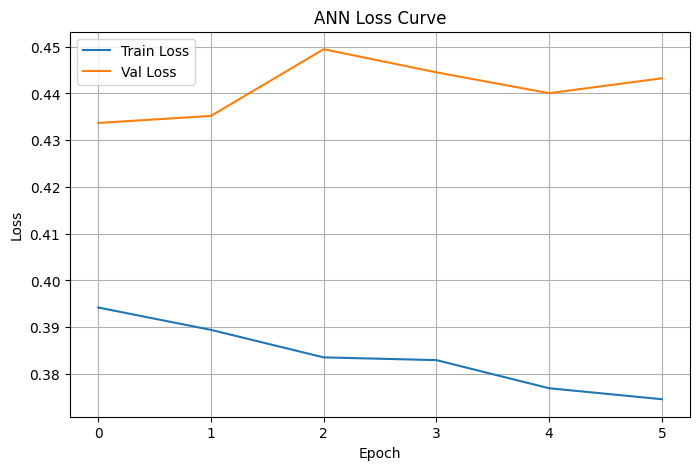

In [306]:
# Plot Accuracy and Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("ANN Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("ANN Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

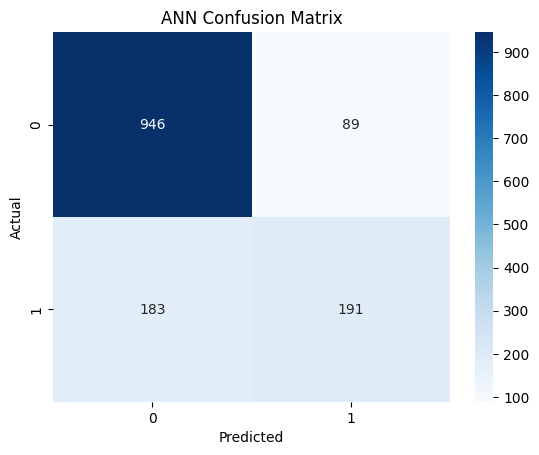

In [307]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN Confusion Matrix')
plt.show()

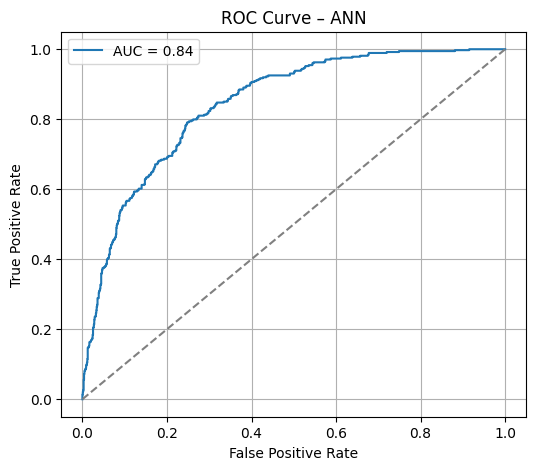

In [308]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_nn)
roc_value = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_value:.2f}")
plt.plot([0,1],[0,1],'--',color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – ANN")
plt.legend()
plt.grid(True)
plt.show()

In [309]:
# Evaluation
print("Final ANN Evaluation:")
print("Accuracy :", accuracy_score(y_test_np, y_pred))
print("Precision:", precision_score(y_test_np, y_pred))
print("Recall   :", recall_score(y_test_np, y_pred))
print("F1 Score :", f1_score(y_test_np, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test_np, y_pred_prob))

print("\nClassification Report:\n")
print(classification_report(y_test_np, y_pred))

Final ANN Evaluation:
Accuracy : 0.8069552874378992
Precision: 0.6821428571428572
Recall   : 0.5106951871657754
F1 Score : 0.5840978593272171
ROC-AUC  : 0.8438812679221888

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.51      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### Evaluation  

In [271]:
dt_model = best_dt

# ANN Predictions
y_pred_prob_nn = final_model.predict(X_test_np).ravel()
y_pred_nn = (y_pred_prob_nn >= 0.5).astype(int)

# Decision Tree Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

#  Metrics Dictionaries
metrics_nn = {
    'Accuracy': accuracy_score(y_test, y_pred_nn),
    'F1-Score': f1_score(y_test, y_pred_nn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_prob_nn)
}

metrics_dt = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_pred_prob_dt)
}

# Create Comparison Table
comparison_dict = {
    'Metric': ['Accuracy', 'F1-Score', 'ROC-AUC'],
    'Neural Network': [
        metrics_nn['Accuracy'], metrics_nn['F1-Score'], metrics_nn['ROC-AUC']
    ],
    'Decision Tree': [
        metrics_dt['Accuracy'], metrics_dt['F1-Score'], metrics_dt['ROC-AUC']
    ]
}

comparison_df = pd.DataFrame(comparison_dict)

print("\n===== MODEL METRICS COMPARISON =====")
print(comparison_df)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

===== MODEL METRICS COMPARISON =====
     Metric  Neural Network  Decision Tree
0  Accuracy        0.806955       0.732434
1  F1-Score        0.584098       0.618807
2   ROC-AUC        0.843881       0.821117


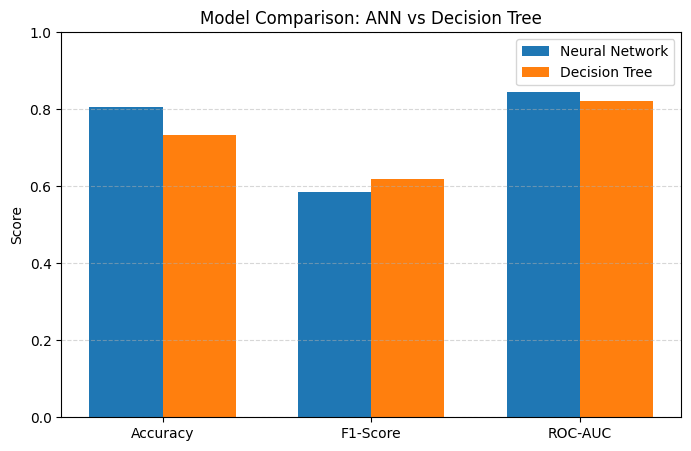

In [272]:
# Metrics to compare
metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']

# ANN metric values
ann_values = [
    metrics_nn['Accuracy'],
    metrics_nn['F1-Score'],
    metrics_nn['ROC-AUC']
]

# Decision Tree metric values
dt_values = [
    metrics_dt['Accuracy'],
    metrics_dt['F1-Score'],
    metrics_dt['ROC-AUC']
]

# Bar positions
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))

# Create bars
plt.bar(x - width/2, ann_values, width, label='Neural Network')
plt.bar(x + width/2, dt_values, width, label='Decision Tree')

# Labels & formatting
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Comparison: ANN vs Decision Tree')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
